In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Testing different sampling distributions

In [12]:
x = np.random.normal(0, 1, 1000)

(array([  5.,  20.,  73., 145., 227., 238., 167.,  93.,  24.,   8.]),
 array([-3.19400391, -2.56713052, -1.94025713, -1.31338373, -0.68651034,
        -0.05963695,  0.56723644,  1.19410983,  1.82098322,  2.44785661,
         3.07473   ]),
 <BarContainer object of 10 artists>)

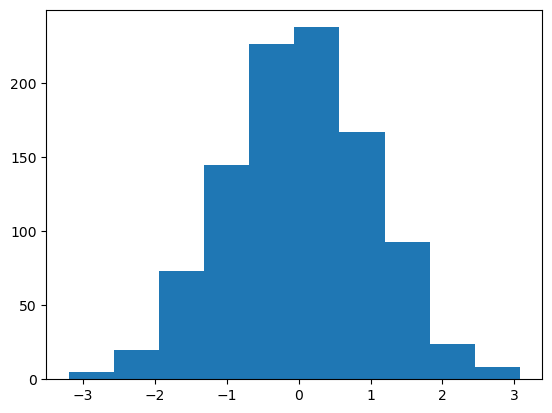

In [13]:
plt.hist(x)

In [14]:
x = np.random.lognormal(0, 1, 1000)

(array([745., 168.,  46.,  16.,  12.,   5.,   4.,   1.,   2.,   1.]),
 array([7.96319390e-03, 2.00589099e+00, 4.00381878e+00, 6.00174657e+00,
        7.99967436e+00, 9.99760216e+00, 1.19955300e+01, 1.39934577e+01,
        1.59913855e+01, 1.79893133e+01, 1.99872411e+01]),
 <BarContainer object of 10 artists>)

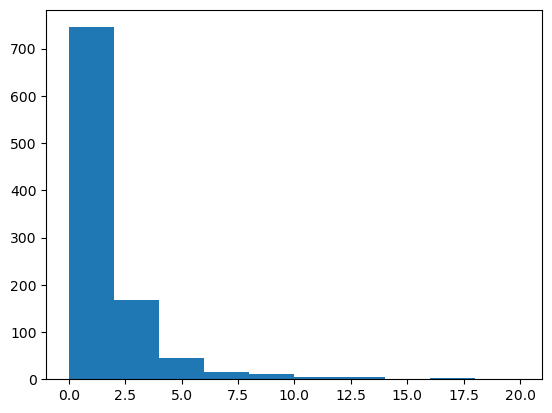

In [15]:
plt.hist(x)

In [16]:
x = np.random.uniform(0, 1, 1000)

(array([ 84., 100.,  88.,  96., 103., 117., 107.,  98., 104., 103.]),
 array([1.40397705e-04, 1.00083324e-01, 2.00026250e-01, 2.99969175e-01,
        3.99912101e-01, 4.99855027e-01, 5.99797953e-01, 6.99740879e-01,
        7.99683805e-01, 8.99626731e-01, 9.99569657e-01]),
 <BarContainer object of 10 artists>)

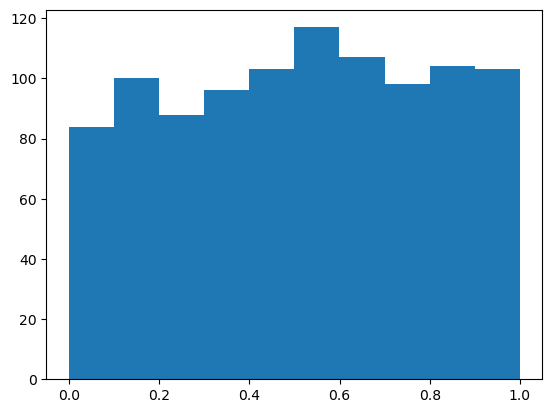

In [17]:
plt.hist(x)

In [38]:
x = np.random.poisson(1, 1000)

(array([350.,   0., 370.,   0., 195.,   0.,  67.,   0.,  16.,   2.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

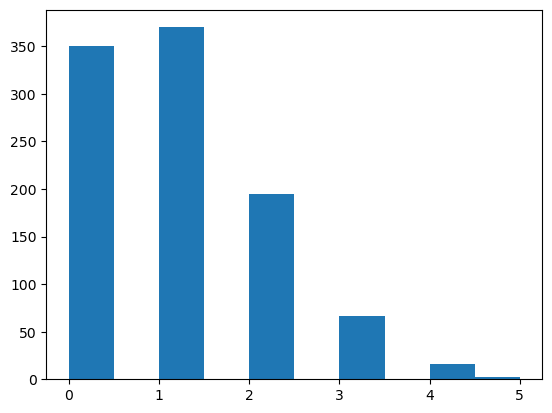

In [39]:
plt.hist(x)

In [42]:
x = np.random.exponential(1, 1000)

(array([514., 277., 113.,  47.,  19.,  18.,   6.,   3.,   1.,   2.]),
 array([3.15883509e-03, 8.02954061e-01, 1.60274929e+00, 2.40254451e+00,
        3.20233974e+00, 4.00213496e+00, 4.80193019e+00, 5.60172542e+00,
        6.40152064e+00, 7.20131587e+00, 8.00111109e+00]),
 <BarContainer object of 10 artists>)

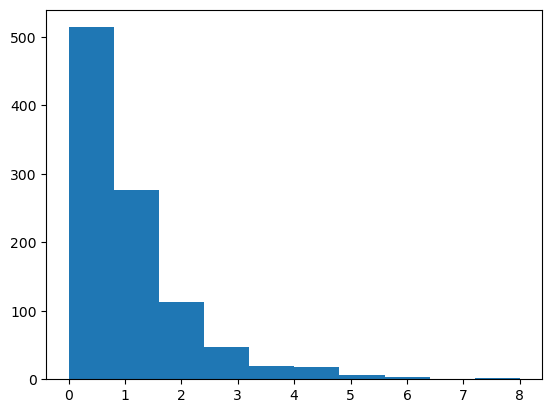

In [43]:
plt.hist(x)

### Creating simple mock dataset

In [44]:
num_samples = 1000
num_features = 10

In [45]:
features = np.random.normal(0, 1, (num_samples, num_features))

In [48]:
weights = np.random.uniform(0, 1, num_features)

In [49]:
targets = np.dot(features, weights)

In [51]:
targets.shape

(1000,)

### Transforming features with Sigmoid function

In [56]:
def Sigmoid(x):
    return 1/(1 + np.exp(-x))

In [57]:
num_samples = 1000
num_features = 10

In [58]:
features = np.random.normal(0, 1, (num_samples, num_features))

In [59]:
transformed_features = Sigmoid(features)

In [60]:
weights = np.random.uniform(0, 1, num_features)

In [61]:
new_targets = np.dot(transformed_features, weights)

### Training a test MLP

In [62]:
from sklearn.neural_network import MLPRegressor

In [76]:
test_model = MLPRegressor(hidden_layer_sizes=(5,), activation='relu', max_iter=10000)

In [77]:
test_model.fit(transformed_features[800:], new_targets[800:])

MLPRegressor(hidden_layer_sizes=(5,), max_iter=10000)

In [79]:
test_model.score(transformed_features[800:], new_targets[800:])

0.4392933429794429